In [2]:
from sklearn import datasets

In [28]:
import matplotlib.pyplot as plt
import numpy as np

In [352]:
import math

In [40]:
import pandas as pd

# I. Linear Regression with One Variable

### Housing Price Portland Data

In [967]:
ftPath = "./data/ex3Data/ex3x.dat"
lbPath = "./data/ex3Data/ex3y.dat"

In [968]:
data = [] # Living area & number of bedroom
with open(ftPath) as f:
    for line in f:
        a = [float(i) for i in line.strip().split(' ')]
        data.append(a)

In [969]:
lbl = [] # Price
with open(lbPath) as f:
    for line in f:
        b = float(line.strip())
        lbl.append(b)

In [970]:
print(len(data), len(lbl))

47 47


### Test only with house area and price

In [971]:
# Draw image between X[0] and y
a = list(zip(*data))[0]
print(a)

(2104.0, 1600.0, 2400.0, 1416.0, 3000.0, 1985.0, 1534.0, 1427.0, 1380.0, 1494.0, 1940.0, 2000.0, 1890.0, 4478.0, 1268.0, 2300.0, 1320.0, 1236.0, 2609.0, 3031.0, 1767.0, 1888.0, 1604.0, 1962.0, 3890.0, 1100.0, 1458.0, 2526.0, 2200.0, 2637.0, 1839.0, 1000.0, 2040.0, 3137.0, 1811.0, 1437.0, 1239.0, 2132.0, 4215.0, 2162.0, 1664.0, 2238.0, 2567.0, 1200.0, 852.0, 1852.0, 1203.0)


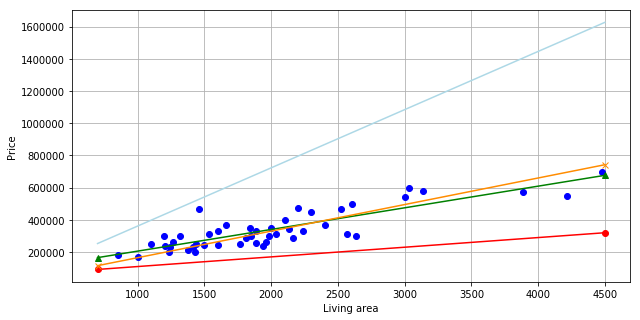

In [1256]:
plt.figure(figsize=(10, 5))
plt.plot(a, lbl, "bo")
# plt.axis([140, 190, 45, 75])
plt.xlabel("Living area")
plt.ylabel("Price")
xLine = np.array([700, 4500])
yLine = 50000 + 60*xLine
yOptima = 71270 + 134.5*xLine
yTest = 4 + 165*xLine
ySGD = -78.34792489 + 361.51173555*xLine
yMini = 165*xLine # similar to yTest
 
plt.plot(xLine, yLine, marker="o", color="r")
plt.plot(xLine, yOptima, marker="^", color="g")
plt.plot(xLine, yTest, marker="x", color="darkorange")
plt.plot(xLine, ySGD, color="lightblue")
plt.grid(True)
plt.show()

In [219]:
npA = np.c_[a].T
npy = np.c_[y]

m = len(a)
A = 1/(2*m) * (npA.T.dot(npA))[0][0]
B = -1/(2*m) * (npA.T.dot(npy))[0][0]
C = 1/(2*m) * (npy.T.dot(npy))[0][0]
print(A, B, C)

2310419.212765957 -382104564.09574467 65591548106.45744


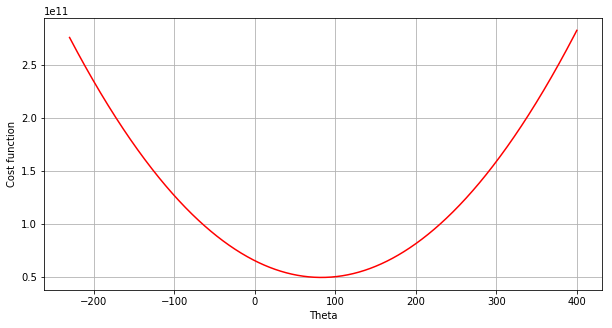

In [77]:
plt.figure(figsize=(10, 5))
theta = np.linspace(-230, 400, 1000)
J = A*theta**2 + B*theta + C
plt.plot(theta, J, color='r')
plt.xlabel("Theta")
plt.ylabel("Cost function")
plt.grid(True)
plt.show()

In [79]:
# Solve the problem for theta0, theta1
from sklearn.linear_model import LinearRegression 
lin_reg = LinearRegression()
lin_reg.fit(npA.reshape(-1, 1), y)
print(lin_reg.intercept_, lin_reg.coef_)

71270.49244872911 [134.52528772]


In [80]:
from mpl_toolkits.mplot3d import Axes3D

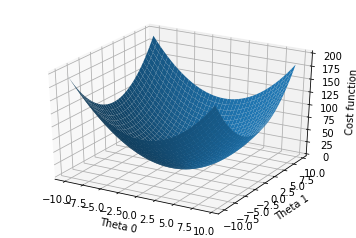

In [84]:
# Draw the 3D for 
def func(x, y):
    return x**2 + y**2

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = y = np.arange(-10.0, 10.0, 0.5)
X, Y = np.meshgrid(x, y)
zs = np.array([func(x,y) for x,y in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)

ax.set_xlabel('Theta 0')
ax.set_ylabel('Theta 1')
ax.set_zlabel('Cost function')

ax.plot_surface(X, Y, Z)

#### Data

In [973]:
m = len(data)
X = np.c_[np.ones((m, 1)), data]

In [974]:
X

array([[1.000e+00, 2.104e+03, 3.000e+00],
       [1.000e+00, 1.600e+03, 3.000e+00],
       [1.000e+00, 2.400e+03, 3.000e+00],
       [1.000e+00, 1.416e+03, 2.000e+00],
       [1.000e+00, 3.000e+03, 4.000e+00],
       [1.000e+00, 1.985e+03, 4.000e+00],
       [1.000e+00, 1.534e+03, 3.000e+00],
       [1.000e+00, 1.427e+03, 3.000e+00],
       [1.000e+00, 1.380e+03, 3.000e+00],
       [1.000e+00, 1.494e+03, 3.000e+00],
       [1.000e+00, 1.940e+03, 4.000e+00],
       [1.000e+00, 2.000e+03, 3.000e+00],
       [1.000e+00, 1.890e+03, 3.000e+00],
       [1.000e+00, 4.478e+03, 5.000e+00],
       [1.000e+00, 1.268e+03, 3.000e+00],
       [1.000e+00, 2.300e+03, 4.000e+00],
       [1.000e+00, 1.320e+03, 2.000e+00],
       [1.000e+00, 1.236e+03, 3.000e+00],
       [1.000e+00, 2.609e+03, 4.000e+00],
       [1.000e+00, 3.031e+03, 4.000e+00],
       [1.000e+00, 1.767e+03, 3.000e+00],
       [1.000e+00, 1.888e+03, 2.000e+00],
       [1.000e+00, 1.604e+03, 3.000e+00],
       [1.000e+00, 1.962e+03, 4.00

In [977]:
y = np.c_[lbl]

In [978]:
y

array([[399900.],
       [329900.],
       [369000.],
       [232000.],
       [539900.],
       [299900.],
       [314900.],
       [198999.],
       [212000.],
       [242500.],
       [239999.],
       [347000.],
       [329999.],
       [699900.],
       [259900.],
       [449900.],
       [299900.],
       [199900.],
       [499998.],
       [599000.],
       [252900.],
       [255000.],
       [242900.],
       [259900.],
       [573900.],
       [249900.],
       [464500.],
       [469000.],
       [475000.],
       [299900.],
       [349900.],
       [169900.],
       [314900.],
       [579900.],
       [285900.],
       [249900.],
       [229900.],
       [345000.],
       [549000.],
       [287000.],
       [368500.],
       [329900.],
       [314000.],
       [299000.],
       [179900.],
       [299900.],
       [239500.]])

#### Batch Gradient Descent

#### With dummy init

In [975]:
len(X[0])

3

In [1245]:
c = len(X[0])
theta = np.random.randn(c,1)
print(theta)
eta = 2e-7

[[ 0.82537549]
 [ 0.71656381]
 [-0.73965849]]


In [1072]:
tmp1 = X.dot(theta) - y
gradients = (2/m) * X.T.dot(X.dot(theta) - y)
theta = theta - eta * gradients
err = 1/m * math.sqrt((X.dot(theta)-y).T.dot(X.dot(theta)-y))
print("Error:", err) 
print(theta)

Error: 10101.297482260183
[[  0.93994615]
 [165.38227961]
 [  0.349971  ]]


In [1073]:
theta

array([[  0.93994615],
       [165.38227961],
       [  0.349971  ]])

In [1246]:
for i in range(1000):
    tmp1 = X.dot(theta) - y
    gradients = (2/m) * X.T.dot(X.dot(theta) - y)
    theta = theta - eta * gradients
    err = 1/m * math.sqrt((X.dot(theta)-y).T.dot(X.dot(theta)-y))
    print(i)
    # print(gradients)
    print(theta)
    print("MSE:", err)
    print("-"*10)

0
[[-6.77961127e+05]
 [-1.52180258e+09]
 [-2.23118115e+06]]
[[ 9.60967714e-01]
 [ 3.05077079e+02]
 [-2.93422256e-01]]
MSE: 44951.152176629585
----------
1
[[5.39898482e+05]
 [1.29100545e+09]
 [1.83144629e+06]]
[[ 0.85298802]
 [46.87598887]
 [-0.65971151]]
MSE: 38507.0486973293
----------
2
[[-4.93260009e+05]
 [-1.09521091e+09]
 [-1.61504131e+06]]
[[  0.95164002]
 [265.91817045]
 [ -0.33670325]]
MSE: 33101.953388040216
----------
3
[[3.83209232e+05]
 [9.29110857e+08]
 [1.30875053e+06]]
[[ 0.87499817]
 [80.09599899]
 [-0.59845336]]
MSE: 28586.441807831598
----------
4
[[-3.60334301e+05]
 [-7.88201404e+08]
 [-1.17161776e+06]]
[[  0.94706503]
 [237.73627972]
 [ -0.36412981]]
MSE: 24833.73562867088
----------
5
[[2.70443111e+05]
 [6.68662546e+08]
 [9.32576847e+05]]
[[  0.89297641]
 [104.00377058]
 [ -0.55064518]]
MSE: 21735.68499864995
----------
6
[[-2.64670320e+05]
 [-5.67252794e+08]
 [-8.52494679e+05]]
[[  0.94591047]
 [217.45432944]
 [ -0.38014624]]
MSE: 19199.181741968
----------
7
[[1

MSE: 10101.242639579204
----------
277
[[-19065.94784721]
 [    56.19144493]
 [-33189.3832988 ]]
[[  1.95677449]
 [165.38043612]
 [  1.34362138]]
MSE: 10101.242330991003
----------
278
[[-19065.94310233]
 [    56.19142066]
 [-33189.36818176]]
[[  1.96058768]
 [165.38042488]
 [  1.35025925]]
MSE: 10101.242022403043
----------
279
[[-19065.93835745]
 [    56.19139684]
 [-33189.35306472]]
[[  1.96440086]
 [165.38041364]
 [  1.35689713]]
MSE: 10101.241713815323
----------
280
[[-19065.93361257]
 [    56.19137313]
 [-33189.33794769]]
[[  1.96821405]
 [165.3804024 ]
 [  1.36353499]]
MSE: 10101.241405227842
----------
281
[[-19065.92886769]
 [    56.19134906]
 [-33189.32283067]]
[[  1.97202724]
 [165.38039117]
 [  1.37017286]]
MSE: 10101.241096640604
----------
282
[[-19065.92412282]
 [    56.19132526]
 [-33189.30771366]]
[[  1.97584042]
 [165.38037993]
 [  1.37681072]]
MSE: 10101.240788053603
----------
283
[[-19065.91937794]
 [    56.19130129]
 [-33189.29259665]]
[[  1.97965361]
 [165.38036

509
[[-19064.84708665]
 [    56.18590291]
 [-33185.87631794]]
[[  2.84140882]
 [165.37782896]
 [  2.88352705]]
MSE: 10101.170745016043
----------
510
[[-19064.84234222]
 [    56.18587889]
 [-33185.86120239]]
[[  2.84522179]
 [165.37781773]
 [  2.89016422]]
MSE: 10101.17043648377
----------
511
[[-19064.8375978 ]
 [    56.18585502]
 [-33185.84608685]]
[[  2.84903476]
 [165.37780649]
 [  2.89680139]]
MSE: 10101.170127951733
----------
512
[[-19064.83285337]
 [    56.18583116]
 [-33185.83097132]]
[[  2.85284772]
 [165.37779525]
 [  2.90343856]]
MSE: 10101.169819419936
----------
513
[[-19064.82810894]
 [    56.18580738]
 [-33185.81585579]]
[[  2.85666069]
 [165.37778402]
 [  2.91007572]]
MSE: 10101.169510888383
----------
514
[[-19064.82336452]
 [    56.18578326]
 [-33185.80074027]]
[[  2.86047365]
 [165.37777278]
 [  2.91671288]]
MSE: 10101.169202357067
----------
515
[[-19064.8186201 ]
 [    56.18575952]
 [-33185.78562476]]
[[  2.86428662]
 [165.37776154]
 [  2.92335004]]
MSE: 10101.168

751
[[-19063.69899137]
 [    56.18012262]
 [-33182.21854362]]
[[  3.76411952]
 [165.37510971]
 [  4.48963458]]
MSE: 10101.096087203623
----------
752
[[-19063.69424742]
 [    56.18009883]
 [-33182.20342964]]
[[  3.76793226]
 [165.37509847]
 [  4.49627102]]
MSE: 10101.095778729421
----------
753
[[-19063.68950346]
 [    56.18007501]
 [-33182.18831566]]
[[  3.771745  ]
 [165.37508724]
 [  4.50290746]]
MSE: 10101.095470255459
----------
754
[[-19063.68475951]
 [    56.18005087]
 [-33182.17320168]]
[[  3.77555773]
 [165.375076  ]
 [  4.50954389]]
MSE: 10101.095161781737
----------
755
[[-19063.68001555]
 [    56.18002732]
 [-33182.15808771]]
[[  3.77937047]
 [165.37506476]
 [  4.51618032]]
MSE: 10101.094853308257
----------
756
[[-19063.6752716 ]
 [    56.18000318]
 [-33182.14297375]]
[[  3.7831832 ]
 [165.37505353]
 [  4.52281675]]
MSE: 10101.094544835018
----------
757
[[-19063.67052765]
 [    56.17997973]
 [-33182.1278598 ]]
[[  3.78699594]
 [165.37504229]
 [  4.52945318]]
MSE: 10101.09

#### With choosen init

In [1232]:
theta = np.array([[90000], [120], [-8000]])
print(theta)
eta = 2e-7

[[90000]
 [  120]
 [-8000]]


In [1233]:
tmp1 = X.dot(theta) - y
gradients = (2/m) * X.T.dot(X.dot(theta) - y)
theta = theta - eta * gradients
err = 1/m * math.sqrt((X.dot(theta)-y).T.dot(X.dot(theta)-y))
print(err)
print(theta)

10479.197643813908
[[90000.01427706]
 [  153.2157643 ]
 [-7999.95235913]]


In [1234]:
theta

array([[90000.01427706],
       [  153.2157643 ],
       [-7999.95235913]])

In [1235]:
for i in range(1000):
    tmp1 = X.dot(theta) - y
    gradients = (2/m) * X.T.dot(X.dot(theta) - y)
    theta = theta - eta * gradients
    err = 1/m * math.sqrt((X.dot(theta)-y).T.dot(X.dot(theta)-y))
    print(i)
    print(gradients)
    print(theta)
    print("MSE:", err)
    print("-"*10)

0
[[6.15232986e+04]
 [1.40891232e+08]
 [2.05162197e+05]]
[[90000.0019724 ]
 [  125.03751799]
 [-7999.99339157]]
MSE: 10168.983531482438
----------
1
[[-5.12283418e+04]
 [-1.19523612e+08]
 [-1.70963183e+05]]
[[90000.01221807]
 [  148.94224039]
 [-7999.95919893]]
MSE: 9939.739352728866
----------
2
[[4.44233363e+04]
 [1.01396605e+08]
 [1.48118860e+05]]
[[90000.00333341]
 [  128.66291938]
 [-7999.98882271]]
MSE: 9771.429367179642
----------
3
[[-3.67217678e+04]
 [-8.60187575e+07]
 [-1.22571065e+05]]
[[90000.01067776]
 [  145.86667087]
 [-7999.96430849]]
MSE: 9648.483357773624
----------
4
[[3.21168347e+04]
 [7.29731111e+07]
 [1.07065909e+05]]
[[90000.00425439]
 [  131.27204866]
 [-7999.98572168]]
MSE: 9559.023093669522
----------
5
[[-2.62816763e+04]
 [-6.19059827e+07]
 [-8.77442251e+04]]
[[90000.00951073]
 [  143.6532452 ]
 [-7999.96817283]]
MSE: 9494.118711941419
----------
6
[[2.32600912e+04]
 [5.25172900e+07]
 [7.75209192e+04]]
[[90000.00485871]
 [  133.1497872 ]
 [-7999.98367701]]
MS

 [-8000.06313951]]
MSE: 9325.417746804847
----------
266
[[ 521.65822492]
 [  -2.63551346]
 [1668.35065136]]
[[89999.9798183 ]
 [  137.97073729]
 [-8000.06347318]]
MSE: 9325.417746107707
----------
267
[[ 521.65800977]
 [  -2.63551255]
 [1668.34994048]]
[[89999.97971396]
 [  137.97073782]
 [-8000.06380685]]
MSE: 9325.417745410567
----------
268
[[ 521.65779463]
 [  -2.63551107]
 [1668.3492296 ]]
[[89999.97960963]
 [  137.97073835]
 [-8000.06414052]]
MSE: 9325.41774471343
----------
269
[[ 521.65757948]
 [  -2.63551047]
 [1668.34851871]]
[[89999.9795053 ]
 [  137.97073888]
 [-8000.06447419]]
MSE: 9325.417744016291
----------
270
[[ 521.65736434]
 [  -2.63550878]
 [1668.34780783]]
[[89999.97940097]
 [  137.9707394 ]
 [-8000.06480786]]
MSE: 9325.417743319153
----------
271
[[ 521.65714919]
 [  -2.63550818]
 [1668.34709695]]
[[89999.97929664]
 [  137.97073993]
 [-8000.06514153]]
MSE: 9325.417742622016
----------
272
[[ 521.65693405]
 [  -2.63550664]
 [1668.34638607]]
[[89999.97919231]
 [  

MSE: 9325.417613661843
----------
457
[[ 521.61713382]
 [  -2.63529955]
 [1668.21487811]]
[[89999.95989174]
 [  137.97083797]
 [-8000.12720157]]
MSE: 9325.417612964817
----------
458
[[ 521.61691869]
 [  -2.63529853]
 [1668.21416728]]
[[89999.95978742]
 [  137.97083849]
 [-8000.12753521]]
MSE: 9325.417612267789
----------
459
[[ 521.61670356]
 [  -2.63529734]
 [1668.21345646]]
[[89999.95968309]
 [  137.97083902]
 [-8000.12786886]]
MSE: 9325.417611570767
----------
460
[[ 521.61648843]
 [  -2.63529642]
 [1668.21274563]]
[[89999.95957877]
 [  137.97083955]
 [-8000.1282025 ]]
MSE: 9325.41761087374
----------
461
[[ 521.61627331]
 [  -2.63529501]
 [1668.21203481]]
[[89999.95947445]
 [  137.97084008]
 [-8000.12853614]]
MSE: 9325.417610176712
----------
462
[[ 521.61605818]
 [  -2.63529404]
 [1668.21132398]]
[[89999.95937012]
 [  137.9708406 ]
 [-8000.12886978]]
MSE: 9325.417609479691
----------
463
[[ 521.61584305]
 [  -2.63529305]
 [1668.21061316]]
[[89999.9592658 ]
 [  137.97084113]
 [-80

MSE: 9325.417439423542
----------
707
[[ 521.56335469]
 [  -2.63501953]
 [1668.03718108]]
[[89999.93381223]
 [  137.97096972]
 [-8000.21060785]]
MSE: 9325.417438726663
----------
708
[[ 521.56313958]
 [  -2.63501862]
 [1668.03647033]]
[[89999.93370792]
 [  137.97097025]
 [-8000.21094146]]
MSE: 9325.417438029785
----------
709
[[ 521.56292448]
 [  -2.63501735]
 [1668.03575958]]
[[89999.93360361]
 [  137.97097078]
 [-8000.21127507]]
MSE: 9325.417437332906
----------
710
[[ 521.56270937]
 [  -2.63501653]
 [1668.03504883]]
[[89999.9334993 ]
 [  137.97097131]
 [-8000.21160868]]
MSE: 9325.41743663603
----------
711
[[ 521.56249427]
 [  -2.63501517]
 [1668.03433808]]
[[89999.93339498]
 [  137.97097183]
 [-8000.21194228]]
MSE: 9325.417435939153
----------
712
[[ 521.56227916]
 [  -2.635014  ]
 [1668.03362733]]
[[89999.93329067]
 [  137.97097236]
 [-8000.21227589]]
MSE: 9325.417435242278
----------
713
[[ 521.56206406]
 [  -2.63501297]
 [1668.03291658]]
[[89999.93318636]
 [  137.97097289]
 [-80

MSE: 9325.417265222248
----------
957
[[ 521.50958126]
 [  -2.63474004]
 [1667.85950292]]
[[89999.90773542]
 [  137.97110147]
 [-8000.29400525]]
MSE: 9325.417264525517
----------
958
[[ 521.50936618]
 [  -2.63473841]
 [1667.85879225]]
[[89999.90763111]
 [  137.971102  ]
 [-8000.29433883]]
MSE: 9325.417263828787
----------
959
[[ 521.50915109]
 [  -2.63473778]
 [1667.85808157]]
[[89999.90752681]
 [  137.97110252]
 [-8000.2946724 ]]
MSE: 9325.417263132058
----------
960
[[ 521.50893601]
 [  -2.63473619]
 [1667.8573709 ]]
[[89999.90742251]
 [  137.97110305]
 [-8000.29500597]]
MSE: 9325.417262435329
----------
961
[[ 521.50872093]
 [  -2.63473544]
 [1667.85666023]]
[[89999.90731821]
 [  137.97110358]
 [-8000.29533954]]
MSE: 9325.4172617386
----------
962
[[ 521.50850585]
 [  -2.63473423]
 [1667.85594955]]
[[89999.90721391]
 [  137.9711041 ]
 [-8000.29567311]]
MSE: 9325.417261041874
----------
963
[[ 521.50829077]
 [  -2.6347329 ]
 [1667.85523888]]
[[89999.90710961]
 [  137.97110463]
 [-800

#### With scale data

In [1162]:
from sklearn.preprocessing import MinMaxScaler

In [1238]:
scaler = MinMaxScaler()
scaler.fit(X)
scaleX = scaler.transform(X)

In [1236]:
c = len(X[0])
theta = np.random.randn(c,1)
print(theta)
eta = 0.5

[[ 0.03807165]
 [ 0.33369691]
 [-0.44198234]]


In [1237]:
for i in range(1000):
    tmp1 = scaleX.dot(theta) - y
    gradients = (2/m) * scaleX.T.dot(scaleX.dot(theta) - y)
    theta = theta - eta * gradients
    err = 1/m * math.sqrt((scaleX.dot(theta)-y).T.dot(scaleX.dot(theta)-y))
    print(i)
    print(gradients)
    print(theta)
    print("MSE:", err)
    print("-"*10)

0
[[      0.        ]
 [-261543.11968848]
 [-389977.68283733]]
[[3.80716493e-02]
 [1.30771894e+05]
 [1.94988399e+05]]
MSE: 31260.425071597812
----------
1
[[      0.        ]
 [-147060.76218699]
 [-210438.53711255]]
[[3.80716493e-02]
 [2.04302275e+05]
 [3.00207668e+05]]
MSE: 20851.27680806423
----------
2
[[      0.        ]
 [ -84410.59719916]
 [-112401.90574991]]
[[3.80716493e-02]
 [2.46507573e+05]
 [3.56408621e+05]]
MSE: 16491.59766939267
----------
3
[[     0.        ]
 [-50083.46122999]
 [-58896.17711825]]
[[3.80716493e-02]
 [2.71549304e+05]
 [3.85856709e+05]]
MSE: 14918.04667646753
----------
4
[[     0.        ]
 [-31234.06784353]
 [-29720.37196346]]
[[3.80716493e-02]
 [2.87166338e+05]
 [4.00716895e+05]]
MSE: 14387.846769752365
----------
5
[[     0.        ]
 [-20843.79503431]
 [-13836.85908132]]
[[3.80716493e-02]
 [2.97588235e+05]
 [4.07635325e+05]]
MSE: 14199.48131617571
----------
6
[[     0.        ]
 [-15077.66817554]
 [ -5214.79173082]]
[[3.80716493e-02]
 [3.05127069e+05]

 [3.06410954e+05]]
MSE: 13324.573886621305
----------
265
[[  0.        ]
 [-17.48064049]
 [ 11.11534282]]
[[3.80716493e-02]
 [4.82447946e+05]
 [3.06405396e+05]]
MSE: 13324.573717332796
----------
266
[[  0.        ]
 [-17.0690018 ]
 [ 10.85359582]]
[[3.80716493e-02]
 [4.82456480e+05]
 [3.06399970e+05]]
MSE: 13324.573555923309
----------
267
[[  0.        ]
 [-16.66705648]
 [ 10.59801251]]
[[3.80716493e-02]
 [4.82464814e+05]
 [3.06394671e+05]]
MSE: 13324.573402026143
----------
268
[[  0.        ]
 [-16.27457627]
 [ 10.34844773]]
[[3.80716493e-02]
 [4.82472951e+05]
 [3.06389496e+05]]
MSE: 13324.57325529166
----------
269
[[  0.        ]
 [-15.89133829]
 [ 10.10475978]]
[[3.80716493e-02]
 [4.82480897e+05]
 [3.06384444e+05]]
MSE: 13324.573115386489
----------
270
[[  0.        ]
 [-15.5171249 ]
 [  9.86681025]]
[[3.80716493e-02]
 [4.82488655e+05]
 [3.06379511e+05]]
MSE: 13324.572981992786
----------
271
[[  0.        ]
 [-15.15172358]
 [  9.63446402]]
[[3.80716493e-02]
 [4.82496231e+05]


[[ 0.        ]
 [-0.19344402]
 [ 0.12300445]]
[[3.80716493e-02]
 [4.82806361e+05]
 [3.06177492e+05]]
MSE: 13324.570249717957
----------
455
[[ 0.        ]
 [-0.18888875]
 [ 0.12010791]]
[[3.80716493e-02]
 [4.82806456e+05]
 [3.06177432e+05]]
MSE: 13324.570249698192
----------
456
[[ 0.        ]
 [-0.18444075]
 [ 0.11727958]]
[[3.80716493e-02]
 [4.82806548e+05]
 [3.06177374e+05]]
MSE: 13324.570249679344
----------
457
[[ 0.        ]
 [-0.18009749]
 [ 0.11451785]]
[[3.80716493e-02]
 [4.82806638e+05]
 [3.06177316e+05]]
MSE: 13324.570249661374
----------
458
[[ 0.        ]
 [-0.17585651]
 [ 0.11182115]]
[[3.80716493e-02]
 [4.82806726e+05]
 [3.06177260e+05]]
MSE: 13324.57024964424
----------
459
[[ 0.        ]
 [-0.17171539]
 [ 0.10918796]]
[[3.80716493e-02]
 [4.82806812e+05]
 [3.06177206e+05]]
MSE: 13324.570249627908
----------
460
[[ 0.        ]
 [-0.1676718 ]
 [ 0.10661677]]
[[3.80716493e-02]
 [4.82806896e+05]
 [3.06177153e+05]]
MSE: 13324.570249612332
----------
461
[[ 0.        ]
 [-0.1

704
[[ 0.        ]
 [-0.00050032]
 [ 0.00031814]]
[[3.80716493e-02]
 [4.82810361e+05]
 [3.06174949e+05]]
MSE: 13324.570249293265
----------
705
[[ 0.        ]
 [-0.00048854]
 [ 0.00031065]]
[[3.80716493e-02]
 [4.82810362e+05]
 [3.06174948e+05]]
MSE: 13324.570249293261
----------
706
[[ 0.        ]
 [-0.00047704]
 [ 0.00030333]]
[[3.80716493e-02]
 [4.82810362e+05]
 [3.06174948e+05]]
MSE: 13324.570249293261
----------
707
[[ 0.        ]
 [-0.0004658 ]
 [ 0.00029619]]
[[3.80716493e-02]
 [4.82810362e+05]
 [3.06174948e+05]]
MSE: 13324.570249293261
----------
708
[[ 0.        ]
 [-0.00045484]
 [ 0.00028921]]
[[3.80716493e-02]
 [4.82810362e+05]
 [3.06174948e+05]]
MSE: 13324.57024929326
----------
709
[[ 0.        ]
 [-0.00044412]
 [ 0.0002824 ]]
[[3.80716493e-02]
 [4.82810363e+05]
 [3.06174948e+05]]
MSE: 13324.57024929326
----------
710
[[ 0.        ]
 [-0.00043367]
 [ 0.00027575]]
[[3.80716493e-02]
 [4.82810363e+05]
 [3.06174948e+05]]
MSE: 13324.57024929326
----------
711
[[ 0.        ]
 [-0

954
[[ 0.00000000e+00]
 [-1.29402765e-06]
 [ 8.22852599e-07]]
[[3.80716493e-02]
 [4.82810372e+05]
 [3.06174942e+05]]
MSE: 13324.57024929326
----------
955
[[ 0.00000000e+00]
 [-1.26355463e-06]
 [ 8.03478736e-07]]
[[3.80716493e-02]
 [4.82810372e+05]
 [3.06174942e+05]]
MSE: 13324.57024929326
----------
956
[[ 0.00000000e+00]
 [-1.23379620e-06]
 [ 7.84554125e-07]]
[[3.80716493e-02]
 [4.82810372e+05]
 [3.06174942e+05]]
MSE: 13324.570249293256
----------
957
[[ 0.00000000e+00]
 [-1.20476285e-06]
 [ 7.66053842e-07]]
[[3.80716493e-02]
 [4.82810372e+05]
 [3.06174942e+05]]
MSE: 13324.57024929326
----------
958
[[ 0.0000000e+00]
 [-1.1763687e-06]
 [ 7.4804693e-07]]
[[3.80716493e-02]
 [4.82810372e+05]
 [3.06174942e+05]]
MSE: 13324.57024929326
----------
959
[[ 0.00000000e+00]
 [-1.14867656e-06]
 [ 7.30419917e-07]]
[[3.80716493e-02]
 [4.82810372e+05]
 [3.06174942e+05]]
MSE: 13324.57024929326
----------
960
[[ 0.00000000e+00]
 [-1.12163972e-06]
 [ 7.13207787e-07]]
[[3.80716493e-02]
 [4.82810372e+05

In [1244]:
Z = np.array([[3.80716493e-02], [4.82810372e+05], [3.06174942e+05]]).reshape(1, 3)
scaleZ = scaler.transform(Z)
print(scaleZ)

[[-9.61928351e-01  1.32917367e+02  7.65434855e+04]]


### Using sklearn built-in function

In [1225]:
from sklearn.linear_model import LinearRegression 
lin_reg = LinearRegression()
lin_reg.fit(data, lbl)
print(lin_reg.intercept_, lin_reg.coef_)

89597.90954279748 [  139.21067402 -8738.01911233]


In [1227]:
lin_reg.score(data, lbl)

0.7329450180289141

In [388]:
lin_reg.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': False}

In [1231]:
theta_best = np.array([[89597.9], [139.21067402], [-8738.01911233]])
error = 1/m * math.sqrt((X.dot(theta_best)-y).T.dot(X.dot(theta_best)-y))
print(error)

9324.595822859925


### Stochastic Gradient Descent

In [1259]:
n_epochs = 60
t0, t1 = 2, 10000000 # learning schedule hyperparameters

def learning_schedule(t): 
    return t0/(t+t1)
c = len(X[0])
theta = np.random.randn(c,1) # random initialization
print(theta)
minErr = 1e6
for epoch in range(n_epochs): 
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        # Should or shouldn't?
        tmpTheta = theta - eta * gradients
        err = 1/m * math.sqrt((X.dot(tmpTheta)-y).T.dot(X.dot(tmpTheta)-y))
        if err < minErr:
            theta = tmpTheta
            minErr = err
            print("Update!")
        print(epoch*m + 1)
        print("Eta:", eta)
        print(theta)
        print("Error:", err, "- Min Error:", minErr)
        
        

[[-0.58768687]
 [-0.11756523]
 [-0.90630311]]
Update!
1
Eta: 2e-07
[[ -0.48765797]
 [143.62396282]
 [ -0.60621641]]
Error: 12189.798234546892 - Min Error: 12189.798234546892
1
Eta: 1.99999980000002e-07
[[ -0.48765797]
 [143.62396282]
 [ -0.60621641]]
Error: 35635.348626218576 - Min Error: 12189.798234546892
1
Eta: 1.99999960000008e-07
[[ -0.48765797]
 [143.62396282]
 [ -0.60621641]]
Error: 14678.359467088952 - Min Error: 12189.798234546892
Update!
1
Eta: 1.99999940000018e-07
[[ -0.47870473]
 [154.69015834]
 [ -0.57935672]]
Error: 10643.364417086437 - Min Error: 10643.364417086437
1
Eta: 1.99999920000032e-07
[[ -0.47870473]
 [154.69015834]
 [ -0.57935672]]
Error: 27130.466693456987 - Min Error: 10643.364417086437
1
Eta: 1.9999990000005e-07
[[ -0.47870473]
 [154.69015834]
 [ -0.57935672]]
Error: 17330.302586634883 - Min Error: 10643.364417086437
1
Eta: 1.99999880000072e-07
[[ -0.47870473]
 [154.69015834]
 [ -0.57935672]]
Error: 29950.768509876947 - Min Error: 10643.364417086437
1
Eta: 1.

Error: 10121.707126626474 - Min Error: 10102.130914004721
236
Eta: 1.9999516011712516e-07
[[ -0.46895876]
 [165.7829893 ]
 [ -0.54456834]]
Error: 10324.215555646924 - Min Error: 10102.130914004721
236
Eta: 1.9999514011809512e-07
[[ -0.46895876]
 [165.7829893 ]
 [ -0.54456834]]
Error: 12065.9265890264 - Min Error: 10102.130914004721
236
Eta: 1.9999512011906909e-07
[[ -0.46895876]
 [165.7829893 ]
 [ -0.54456834]]
Error: 10961.1551854645 - Min Error: 10102.130914004721
236
Eta: 1.9999510012004707e-07
[[ -0.46895876]
 [165.7829893 ]
 [ -0.54456834]]
Error: 10863.394894978836 - Min Error: 10102.130914004721
236
Eta: 1.9999508012102903e-07
[[ -0.46895876]
 [165.7829893 ]
 [ -0.54456834]]
Error: 10893.015676643618 - Min Error: 10102.130914004721
236
Eta: 1.9999506012201498e-07
[[ -0.46895876]
 [165.7829893 ]
 [ -0.54456834]]
Error: 21924.105726067228 - Min Error: 10102.130914004721
236
Eta: 1.9999504012300496e-07
[[ -0.46895876]
 [165.7829893 ]
 [ -0.54456834]]
Error: 10121.707103713028 - Min

471
Eta: 1.9999060044177923e-07
[[ -0.46895876]
 [165.7829893 ]
 [ -0.54456834]]
Error: 10961.11894592764 - Min Error: 10102.130914004721
471
Eta: 1.999905804436611e-07
[[ -0.46895876]
 [165.7829893 ]
 [ -0.54456834]]
Error: 10122.307216786867 - Min Error: 10102.130914004721
471
Eta: 1.9999056044554698e-07
[[ -0.46895876]
 [165.7829893 ]
 [ -0.54456834]]
Error: 16947.181526530763 - Min Error: 10102.130914004721
471
Eta: 1.9999054044743685e-07
[[ -0.46895876]
 [165.7829893 ]
 [ -0.54456834]]
Error: 10121.706367233355 - Min Error: 10102.130914004721
471
Eta: 1.999905204493307e-07
[[ -0.46895876]
 [165.7829893 ]
 [ -0.54456834]]
Error: 16897.473740214715 - Min Error: 10102.130914004721
471
Eta: 1.9999050045122858e-07
[[ -0.46895876]
 [165.7829893 ]
 [ -0.54456834]]
Error: 11060.228523468635 - Min Error: 10102.130914004721
471
Eta: 1.9999048045313044e-07
[[ -0.46895876]
 [165.7829893 ]
 [ -0.54456834]]
Error: 35958.39537300914 - Min Error: 10102.130914004721
471
Eta: 1.999904604550363e-07


Eta: 1.999864209220194e-07
[[ -0.46895876]
 [165.7829893 ]
 [ -0.54456834]]
Error: 19036.50802907541 - Min Error: 10102.130914004721
659
Eta: 1.9998640092473713e-07
[[ -0.46895876]
 [165.7829893 ]
 [ -0.54456834]]
Error: 12902.2223881936 - Min Error: 10102.130914004721
659
Eta: 1.9998638092745884e-07
[[ -0.46895876]
 [165.7829893 ]
 [ -0.54456834]]
Error: 15243.70970130594 - Min Error: 10102.130914004721
659
Eta: 1.9998636093018457e-07
[[ -0.46895876]
 [165.7829893 ]
 [ -0.54456834]]
Error: 13827.517160452198 - Min Error: 10102.130914004721
659
Eta: 1.9998634093291427e-07
[[ -0.46895876]
 [165.7829893 ]
 [ -0.54456834]]
Error: 25788.47664668306 - Min Error: 10102.130914004721
659
Eta: 1.99986320935648e-07
[[ -0.46895876]
 [165.7829893 ]
 [ -0.54456834]]
Error: 10839.487498408953 - Min Error: 10102.130914004721
659
Eta: 1.9998630093838572e-07
[[ -0.46895876]
 [165.7829893 ]
 [ -0.54456834]]
Error: 16897.24674975028 - Min Error: 10102.130914004721
659
Eta: 1.9998628094112744e-07
[[ -0.46

Eta: 1.9998142172592165e-07
[[ -0.46895876]
 [165.7829893 ]
 [ -0.54456834]]
Error: 13362.176304705641 - Min Error: 10102.130914004721
894
Eta: 1.9998140172963915e-07
[[ -0.46895876]
 [165.7829893 ]
 [ -0.54456834]]
Error: 22328.338028600207 - Min Error: 10102.130914004721
894
Eta: 1.9998138173336062e-07
[[ -0.46895876]
 [165.7829893 ]
 [ -0.54456834]]
Error: 19036.16608715802 - Min Error: 10102.130914004721
894
Eta: 1.999813617370861e-07
[[ -0.46895876]
 [165.7829893 ]
 [ -0.54456834]]
Error: 21922.93045185675 - Min Error: 10102.130914004721
894
Eta: 1.999813417408156e-07
[[ -0.46895876]
 [165.7829893 ]
 [ -0.54456834]]
Error: 15243.491903768094 - Min Error: 10102.130914004721
894
Eta: 1.9998132174454905e-07
[[ -0.46895876]
 [165.7829893 ]
 [ -0.54456834]]
Error: 16946.625326818983 - Min Error: 10102.130914004721
894
Eta: 1.9998130174828654e-07
[[ -0.46895876]
 [165.7829893 ]
 [ -0.54456834]]
Error: 13362.172820388168 - Min Error: 10102.130914004721
894
Eta: 1.9998128175202802e-07
[[ 

1176
Eta: 1.9997642277975427e-07
[[ -0.46895876]
 [165.7829893 ]
 [ -0.54456834]]
Error: 10216.621521945728 - Min Error: 10102.130914004721
1176
Eta: 1.9997640278447143e-07
[[ -0.46895876]
 [165.7829893 ]
 [ -0.54456834]]
Error: 22166.950770273954 - Min Error: 10102.130914004721
1176
Eta: 1.999763827891926e-07
[[ -0.46895876]
 [165.7829893 ]
 [ -0.54456834]]
Error: 18236.49207940216 - Min Error: 10102.130914004721
1176
Eta: 1.9997636279391777e-07
[[ -0.46895876]
 [165.7829893 ]
 [ -0.54456834]]
Error: 10324.171688818435 - Min Error: 10102.130914004721
1176
Eta: 1.9997634279864692e-07
[[ -0.46895876]
 [165.7829893 ]
 [ -0.54456834]]
Error: 11060.09504723454 - Min Error: 10102.130914004721
1176
Eta: 1.999763228033801e-07
[[ -0.46895876]
 [165.7829893 ]
 [ -0.54456834]]
Error: 18954.121302408665 - Min Error: 10102.130914004721
1176
Eta: 1.9997630280811724e-07
[[ -0.46895876]
 [165.7829893 ]
 [ -0.54456834]]
Error: 15243.27411964212 - Min Error: 10102.130914004721
1176
Eta: 1.9997628281285

1411
Eta: 1.9997142408349846e-07
[[ -0.46895876]
 [165.7829893 ]
 [ -0.54456834]]
Error: 10122.302437577177 - Min Error: 10102.130914004721
1411
Eta: 1.9997140408921525e-07
[[ -0.46895876]
 [165.7829893 ]
 [ -0.54456834]]
Error: 46381.262991626725 - Min Error: 10102.130914004721
1411
Eta: 1.99971384094936e-07
[[ -0.46895876]
 [165.7829893 ]
 [ -0.54456834]]
Error: 10960.96487354611 - Min Error: 10102.130914004721
1411
Eta: 1.999713641006608e-07
[[ -0.46895876]
 [165.7829893 ]
 [ -0.54456834]]
Error: 18953.78742110731 - Min Error: 10102.130914004721
1411
Eta: 1.9997134410638955e-07
[[ -0.46895876]
 [165.7829893 ]
 [ -0.54456834]]
Error: 13827.039389768535 - Min Error: 10102.130914004721
1411
Eta: 1.9997132411212233e-07
[[ -0.46895876]
 [165.7829893 ]
 [ -0.54456834]]
Error: 10216.61520001866 - Min Error: 10102.130914004721
1411
Eta: 1.9997130411785908e-07
[[ -0.46895876]
 [165.7829893 ]
 [ -0.54456834]]
Error: 25786.82649238085 - Min Error: 10102.130914004721
1411
Eta: 1.999712841235998

 [ -0.54456834]]
Error: 19035.2367014271 - Min Error: 10102.130914004721
1599
Eta: 1.9996766522853254e-07
[[ -0.46895876]
 [165.7829893 ]
 [ -0.54456834]]
Error: 35954.60323414723 - Min Error: 10102.130914004721
1599
Eta: 1.9996764523500097e-07
[[ -0.46895876]
 [165.7829893 ]
 [ -0.54456834]]
Error: 16945.918100213617 - Min Error: 10102.130914004721
1599
Eta: 1.999676252414734e-07
[[ -0.46895876]
 [165.7829893 ]
 [ -0.54456834]]
Error: 42089.144121099955 - Min Error: 10102.130914004721
1599
Eta: 1.9996760524794984e-07
[[ -0.46895876]
 [165.7829893 ]
 [ -0.54456834]]
Error: 24390.347427438 - Min Error: 10102.130914004721
1599
Eta: 1.9996758525443026e-07
[[ -0.46895876]
 [165.7829893 ]
 [ -0.54456834]]
Error: 10121.702610273038 - Min Error: 10102.130914004721
1599
Eta: 1.9996756526091467e-07
[[ -0.46895876]
 [165.7829893 ]
 [ -0.54456834]]
Error: 12901.759396854037 - Min Error: 10102.130914004721
1599
Eta: 1.999675452674031e-07
[[ -0.46895876]
 [165.7829893 ]
 [ -0.54456834]]
Error: 3217

Eta: 1.9996292687335767e-07
[[ -0.46895876]
 [165.7829893 ]
 [ -0.54456834]]
Error: 10574.978626936221 - Min Error: 10102.130914004721
1834
Eta: 1.999629068807736e-07
[[ -0.46895876]
 [165.7829893 ]
 [ -0.54456834]]
Error: 19034.91246813869 - Min Error: 10102.130914004721
1834
Eta: 1.9996288688819355e-07
[[ -0.46895876]
 [165.7829893 ]
 [ -0.54456834]]
Error: 18235.645987006705 - Min Error: 10102.130914004721
1834
Eta: 1.9996286689561748e-07
[[ -0.46895876]
 [165.7829893 ]
 [ -0.54456834]]
Error: 10136.636648707869 - Min Error: 10102.130914004721
1834
Eta: 1.999628469030454e-07
[[ -0.46895876]
 [165.7829893 ]
 [ -0.54456834]]
Error: 10863.165162702297 - Min Error: 10102.130914004721
1834
Eta: 1.9996282691047734e-07
[[ -0.46895876]
 [165.7829893 ]
 [ -0.54456834]]
Error: 46379.36273401719 - Min Error: 10102.130914004721
1834
Eta: 1.9996280691791326e-07
[[ -0.46895876]
 [165.7829893 ]
 [ -0.54456834]]
Error: 79680.69512668817 - Min Error: 10102.130914004721
1834
Eta: 1.9996278692535318e-

Error: 25730.194961644287 - Min Error: 10102.130914004721
2022
Eta: 1.9995892843609923e-07
[[ -0.46895876]
 [165.7829893 ]
 [ -0.54456834]]
Error: 18235.397824862204 - Min Error: 10102.130914004721
2022
Eta: 1.999589084443147e-07
[[ -0.46895876]
 [165.7829893 ]
 [ -0.54456834]]
Error: 42087.420383273784 - Min Error: 10102.130914004721
2022
Eta: 1.9995888845253417e-07
[[ -0.46895876]
 [165.7829893 ]
 [ -0.54456834]]
Error: 21921.002358288515 - Min Error: 10102.130914004721
2022
Eta: 1.9995886846075762e-07
[[ -0.46895876]
 [165.7829893 ]
 [ -0.54456834]]
Error: 13361.52134779766 - Min Error: 10102.130914004721
2022
Eta: 1.9995884846898507e-07
[[ -0.46895876]
 [165.7829893 ]
 [ -0.54456834]]
Error: 22165.399228469356 - Min Error: 10102.130914004721
2022
Eta: 1.9995882847721654e-07
[[ -0.46895876]
 [165.7829893 ]
 [ -0.54456834]]
Error: 10892.74761184903 - Min Error: 10102.130914004721
2022
Eta: 1.99958808485452e-07
[[ -0.46895876]
 [165.7829893 ]
 [ -0.54456834]]
Error: 10107.868287393925

Eta: 1.999551900419116e-07
[[ -0.46895876]
 [165.7829893 ]
 [ -0.54456834]]
Error: 10216.595196226182 - Min Error: 10102.130914004721
2210
Eta: 1.999551700508746e-07
[[ -0.46895876]
 [165.7829893 ]
 [ -0.54456834]]
Error: 18884.568141191314 - Min Error: 10102.130914004721
2210
Eta: 1.999551500598416e-07
[[ -0.46895876]
 [165.7829893 ]
 [ -0.54456834]]
Error: 16945.229202684117 - Min Error: 10102.130914004721
2210
Eta: 1.9995513006881255e-07
[[ -0.46895876]
 [165.7829893 ]
 [ -0.54456834]]
Error: 37183.57567304073 - Min Error: 10102.130914004721
2210
Eta: 1.9995511007778753e-07
[[ -0.46895876]
 [165.7829893 ]
 [ -0.54456834]]
Error: 79677.6726265712 - Min Error: 10102.130914004721
2210
Eta: 1.999550900867665e-07
[[ -0.46895876]
 [165.7829893 ]
 [ -0.54456834]]
Error: 19034.38206598341 - Min Error: 10102.130914004721
2210
Eta: 1.9995507009574949e-07
[[ -0.46895876]
 [165.7829893 ]
 [ -0.54456834]]
Error: 46377.64422982991 - Min Error: 10102.130914004721
2210
Eta: 1.9995505010473646e-07
[

Eta: 1.999501924070714e-07
[[ -0.46895876]
 [165.7829893 ]
 [ -0.54456834]]
Error: 18234.85015352418 - Min Error: 10102.130914004721
2492
Eta: 1.9995017241703368e-07
[[ -0.46895876]
 [165.7829893 ]
 [ -0.54456834]]
Error: 42085.692847039936 - Min Error: 10102.130914004721
2492
Eta: 1.9995015242699996e-07
[[ -0.46895876]
 [165.7829893 ]
 [ -0.54456834]]
Error: 18884.227193802013 - Min Error: 10102.130914004721
2492
Eta: 1.9995013243697023e-07
[[ -0.46895876]
 [165.7829893 ]
 [ -0.54456834]]
Error: 16944.937074990925 - Min Error: 10102.130914004721
2492
Eta: 1.9995011244694447e-07
[[ -0.46895876]
 [165.7829893 ]
 [ -0.54456834]]
Error: 18884.22447716837 - Min Error: 10102.130914004721
2492
Eta: 1.9995009245692274e-07
[[ -0.46895876]
 [165.7829893 ]
 [ -0.54456834]]
Error: 12901.32992891388 - Min Error: 10102.130914004721
2492
Eta: 1.99950072466905e-07
[[ -0.46895876]
 [165.7829893 ]
 [ -0.54456834]]
Error: 13361.265919809188 - Min Error: 10102.130914004721
2492
Eta: 1.9995005247689127e-0

Eta: 1.9994519502204446e-07
[[ -0.46895876]
 [165.7829893 ]
 [ -0.54456834]]
Error: 12368.18003243603 - Min Error: 10102.130914004721
2727
Eta: 1.9994517503300594e-07
[[ -0.46895876]
 [165.7829893 ]
 [ -0.54456834]]
Error: 10574.89313676399 - Min Error: 10102.130914004721
2727
Eta: 1.9994515504397143e-07
[[ -0.46895876]
 [165.7829893 ]
 [ -0.54456834]]
Error: 15517.435192303194 - Min Error: 10102.130914004721
2727
Eta: 1.9994513505494093e-07
[[ -0.46895876]
 [165.7829893 ]
 [ -0.54456834]]
Error: 18952.021395607284 - Min Error: 10102.130914004721
2727
Eta: 1.999451150659144e-07
[[ -0.46895876]
 [165.7829893 ]
 [ -0.54456834]]
Error: 11835.874012237313 - Min Error: 10102.130914004721
2727
Eta: 1.9994509507689189e-07
[[ -0.46895876]
 [165.7829893 ]
 [ -0.54456834]]
Error: 10107.86708689823 - Min Error: 10102.130914004721
2727
Eta: 1.9994507508787336e-07
[[ -0.46895876]
 [165.7829893 ]
 [ -0.54456834]]
Error: 10892.64592224664 - Min Error: 10102.130914004721
2727
Eta: 1.9994505509885883e-

### Mini-batch Gradient Descent

In [1260]:
random_index = np.random.choice(m, 10, replace=False)
print(len(random_index), len(set(random_index)))

10 10


In [1265]:
n_epochs = 100
batch_size = 10
t0, t1 = 2, 10000000 # learning schedule hyperparameters

def learning_schedule(t): 
    return t0/(t+t1)
c = len(X[0])
theta = np.random.randn(c,1) # random initialization
print(theta)

for epoch in range(n_epochs): 
    #for i in range(m):
    random_index = np.random.choice(m, 10, replace=False)
    xi = X[random_index]
    yi = y[random_index]
    gradients = 2/10 * xi.T.dot(xi.dot(theta) - yi)
    eta = learning_schedule(epoch * m + i)

    theta = theta - eta * gradients
    err = 1/m * math.sqrt((X.dot(theta)-y).T.dot(X.dot(theta)-y))
    print(epoch*m + 1)
    print("Eta:", eta)
    print(theta)
    print("Error:", err)
        

[[0.65740704]
 [0.19197249]
 [0.32704605]]
1
Eta: 1.9999908000423198e-07
[[  0.81637803]
 [446.55516201]
 [  0.85836534]]
Error: 88739.69949790579
48
Eta: 1.9999814001729784e-07
[[  0.64831542]
 [158.76420292]
 [  0.33368345]]
Error: 10312.259356576962
95
Eta: 1.9999720003919944e-07
[[  0.64509878]
 [132.94580688]
 [  0.31287472]]
Error: 14334.506332258325
142
Eta: 1.9999626006993668e-07
[[  0.68002272]
 [221.76822933]
 [  0.43287782]]
Error: 20362.185476440056
189
Eta: 1.9999532010950943e-07
[[  0.6490904 ]
 [159.98746702]
 [  0.33376111]]
Error: 10241.967918540062
236
Eta: 1.9999438015791755e-07
[[  0.65582413]
 [162.37720133]
 [  0.34678496]]
Error: 10145.159368034569
283
Eta: 1.9999344021516094e-07
[[  0.66871528]
 [170.75985887]
 [  0.37398729]]
Error: 10241.06039814189
330
Eta: 1.9999250028123945e-07
[[  0.65623971]
 [129.40849779]
 [  0.32914277]]
Error: 15141.639375239332
377
Eta: 1.9999156035615298e-07
[[  0.70081471]
 [216.00287896]
 [  0.46636624]]
Error: 18813.96346806939
4

### Breast Cancer

5. Number of Instances: 699 (as of 15 July 1992)

6. Number of Attributes: 10 plus the class attribute

7. Attribute Information: (class attribute has been moved to last column)

   #  Attribute                     Domain
   -- -----------------------------------------
   1. Sample code number            id number
   2. Clump Thickness               1 - 10
   3. Uniformity of Cell Size       1 - 10
   4. Uniformity of Cell Shape      1 - 10
   5. Marginal Adhesion             1 - 10
   6. Single Epithelial Cell Size   1 - 10
   7. Bare Nuclei                   1 - 10
   8. Bland Chromatin               1 - 10
   9. Normal Nucleoli               1 - 10
  10. Mitoses                       1 - 10
  11. Class:                        (0 for benign, 1 for malignant)

In [41]:
breastPath = "./data/breast_cancer.csv"
pdBreast = pd.read_csv(breastPath, delimiter=",")

In [42]:
pdBreast.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [44]:
lsCol = pdBreast.columns
ftCol = [c for c in lsCol if c not in ["id", "diagnosis"]]
lbCol = "diagnosis"

In [46]:
data = pdBreast[ftCol].values
label = (pdBreast[lbCol]=='M').values

In [50]:
# Area Mean vs Label
tumorSize = pdBreast["radius_mean"].values

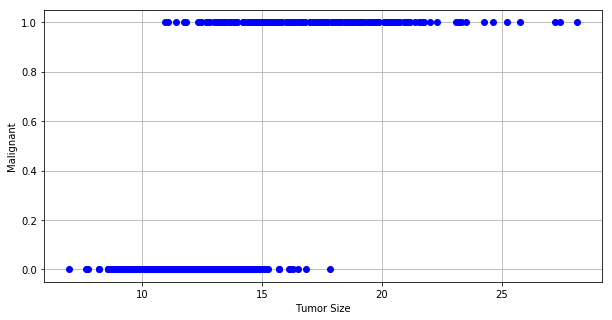

In [51]:
plt.figure(figsize=(10, 5))
plt.plot(tumorSize, label, 'bo')
# plt.axis([140, 190, 45, 75])
plt.xlabel('Tumor Size')
plt.ylabel('Malignant')
plt.grid(True)
plt.show()

### 0. Randomly Generated Data

In [122]:
X = 2 * np.random.rand(100, 1)
# y = 4 + 3 * X + np.random.randn(100, 1)

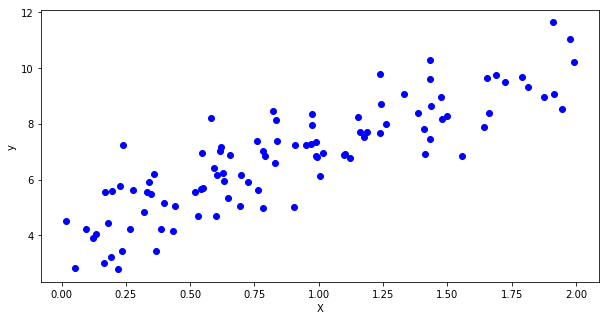

In [17]:
plt.figure(figsize=(10, 5))
plt.plot(X, y, 'bo')
# plt.axis([140, 190, 45, 75])
plt.xlabel('X')
plt.ylabel('y')
plt.show()

### 1. Using Normal Equation

Compute θ_hat using the Normal Equation.  
Use the *inv()* function from NumPy’s Linear Algebra module (np.linalg) to compute the inverse of a matrix  
*dot()* method for matrix multiplication

In [ ]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance 
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [8]:
theta_best

array([[4.04517201],
       [3.08386373]])

In [11]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance 
y_predict = X_new_b.dot(theta_best)

In [12]:
y_predict


array([[ 4.04517201],
       [10.21289946]])

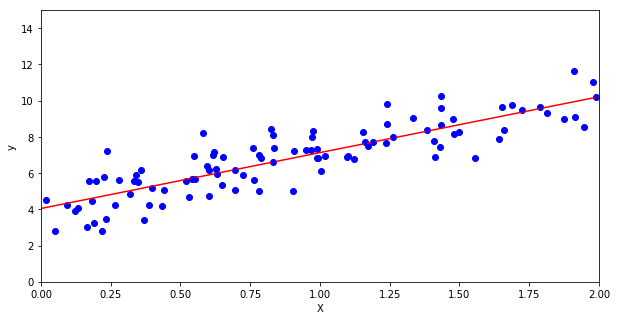

In [16]:
plt.figure(figsize=(10,5))
plt.plot(X, y, 'bo')
# plt.axis([140, 190, 45, 75])
plt.xlabel('X')
plt.ylabel('y')
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

### 2. Using SKLearn

In [18]:
from sklearn.linear_model import LinearRegression 
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.intercept_, lin_reg.coef_)

[4.04517201] [[3.08386373]]


In [19]:
lin_reg.predict(X_new) 

array([[ 4.04517201],
       [10.21289946]])

### 3. Using Gradient Descent

#### 3.1 Batch Gradient Descent

In [20]:
eta = 0.1 # learning rate 
n_iterations = 1000 
m=100 # Number of instances
theta = np.random.randn(2,1) # random initialization
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y) 
    theta = theta - eta * gradients
print(theta)

[[4.04517201]
 [3.08386373]]


### A1. Linear Algebra

In [3]:
from pprint import pprint
import numpy as np

In [8]:
# Matrix
m1 = np.array([[ 23 , 402], 
               [69 , 221], 
               [118, 0]])
pprint(m1)
print("m1.shape =", m1.shape )
v1 = np.array ([149, 92, 313])
pprint(v1)

array([[ 23, 402],
       [ 69, 221],
       [118,   0]])
m1.shape = (3, 2)
array([149,  92, 313])


In [11]:
# Matrix adding
m1 = np.array([[23,402],
               [69,221],
               [118,0]])
m2 = np.array([[93,21],
               [223,11],
               [123,6]])
pprint(m1)
pprint(m2)
pprint((m1+m2))

array([[ 23, 402],
       [ 69, 221],
       [118,   0]])
array([[ 93,  21],
       [223,  11],
       [123,   6]])
array([[116, 423],
       [292, 232],
       [241,   6]])


In [12]:
pprint(3*m1)

array([[  69, 1206],
       [ 207,  663],
       [ 354,    0]])


In [13]:
# Matrix multiplication
m1 = np.array([[1,3,2],
               [4,0,1]])
m2 = np.array([[1,3],
               [0,1],
               [5,2]])
assert(m1.shape[1] == m2.shape[0])
m3 = np.dot(m1,m2)

In [15]:
pprint(m1)
pprint(m2)
pprint(m3)

array([[1, 3, 2],
       [4, 0, 1]])
array([[1, 3],
       [0, 1],
       [5, 2]])
array([[11, 10],
       [ 9, 14]])


In [20]:
# Determinant
m1 = np.array([[23,42,79], 
               [69,6,21], 
               [8,0,9]])
print(np.linalg.det(m1))

-21576.000000000025


In [21]:
# Transpose
m1.T

array([[23, 69,  8],
       [42,  6,  0],
       [79, 21,  9]])

In [18]:
#Inverse
m1 = np.array([[0,5],
               [.5,0]])
inv_m1 = np.linalg.inv(m1)
pprint(inv_m1)
pprint(np.dot(m1, inv_m1))

array([[0. , 2. ],
       [0.2, 0. ]])
array([[1., 0.],
       [0., 1.]])


In [22]:
# Eigenvalues and eigenvectors
pprint(m1)
w,v = np.linalg.eig(m1)
print(w)
pprint(v)

array([[23, 42, 79],
       [69,  6, 21],
       [ 8,  0,  9]])
[ 75.6278032  -44.09739024   6.46958704]
array([[ 0.69512353,  0.60305364, -0.15461194],
       [ 0.7140288 , -0.79250916, -0.85857921],
       [ 0.08346348, -0.09086   ,  0.48881172]])
